# Анализ базы данных сервиса для чтения книг по подписке

## Описание проекта
Компания купила крупный сервис для чтения книг по подписке. Наша первая задача как аналитика — проанализировать базу данных. В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

# Описание данных

**Таблица `books`**

Содержит данные о книгах:

* `book_id` — идентификатор книги;
* `author_id` — идентификатор автора;
* `title` — название книги;
* `num_pages` — количество страниц;
* `publication_date` — дата публикации книги;
* `publisher_id` — идентификатор издателя.

**Таблица `authors`**

Содержит данные об авторах:

* `author_id` — идентификатор автора;
* `author` — имя автора.

**Таблица `publishers`**

Содержит данные об издательствах:

* `publisher_id` — идентификатор издательства;
* `publisher` — название издательства;

**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

* `rating_id` — идентификатор оценки;
* `book_id` — идентификатор книги;
* `username` — имя пользователя, оставившего оценку;
* `rating` — оценка книги.

**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

* `review_id` — идентификатор обзора;
* `book_id` — идентификатор книги;
* `username` — имя пользователя, написавшего обзор;
* `text` — текст обзора.

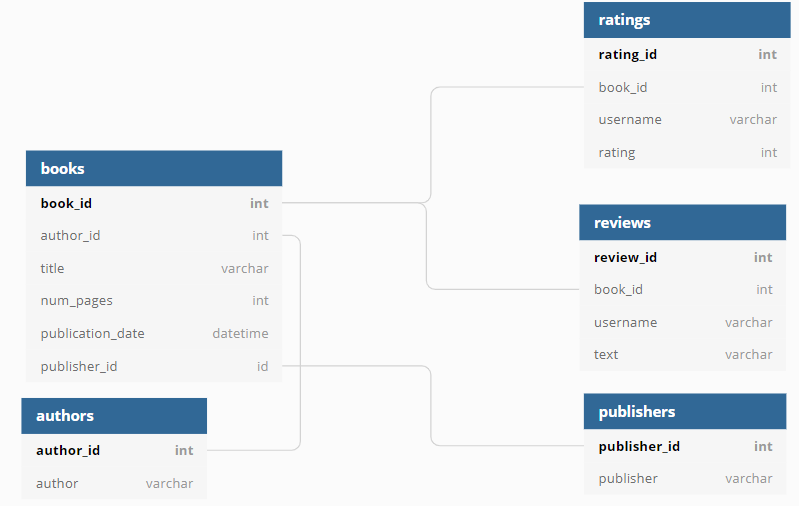

**Цель исследования:** проанализировать базы данных.

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine 

In [2]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

## Исследование таблиц

In [3]:
# выведем первые строки таблицы books 
query = ''' SELECT *
            FROM books
            LIMIT 5
        '''
pd.io.sql.read_sql(query, con = engine)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [4]:
# посчитаем сколько строк в таблице
query = ''' SELECT COUNT(book_id)
            FROM books
        '''
pd.io.sql.read_sql(query, con = engine)

,count
0,1000


In [5]:
# выведем первые строки таблицы authors
query = ''' SELECT *
            FROM authors
            LIMIT 5
        '''
pd.io.sql.read_sql(query, con = engine)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [6]:
# посчитаем сколько строк в таблице
query = ''' SELECT COUNT(author_id)
            FROM authors
        '''
pd.io.sql.read_sql(query, con = engine)

,count
0,636


In [7]:
# выведем первые строки таблицы  publishers
query = ''' SELECT *
            FROM publishers
            LIMIT 5
        '''
pd.io.sql.read_sql(query, con = engine)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [8]:
# посчитаем сколько строк в таблице
query = ''' SELECT COUNT(publisher_id)
            FROM publishers
        '''
pd.io.sql.read_sql(query, con = engine)

,count
0,340


In [9]:
# выведем первые строки таблицы  ratings
query = ''' SELECT *
            FROM ratings
            LIMIT 5
        '''
pd.io.sql.read_sql(query, con = engine)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [10]:
# посчитаем сколько строк в таблице и пользователей, оставивших оценку
query = ''' SELECT COUNT(rating_id),
                   COUNT(DISTINCT username) AS count_users
            FROM ratings
        '''
pd.io.sql.read_sql(query, con = engine)

,count,count_users
0,6456,160


In [11]:
# выведем первые строки  таблицы reviews
query = ''' SELECT *
            FROM reviews
            LIMIT 5
        '''
pd.io.sql.read_sql(query, con = engine)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [12]:
# посчитаем сколько строк в таблице и количество пользователей, оставивших отзыв
query = ''' SELECT  COUNT(review_id),
                    COUNT(DISTINCT username) AS count_users
            FROM reviews
        '''
pd.io.sql.read_sql(query, con = engine)

,count,count_users
0,2793,160


## Посчитаем, сколько книг вышло после 1 января 2000 года

In [13]:
query = ''' SELECT COUNT(book_id) AS number_of_books
            FROM books
            WHERE publication_date > '2000-01-01'
            
        '''
pd.io.sql.read_sql(query, con = engine)

,number_of_books
0,819


**После 1 января 2000 года вышло 819 книг.** 

##  Посчитаем для каждой книги количество обзоров и среднюю оценку

In [14]:
query = ''' SELECT  b.title,
                    number_of_review,  
                    avg_rating 
            FROM books AS b
            LEFT JOIN (SELECT  book_id,
                    COUNT(review_id) AS number_of_review 
            FROM reviews
            GROUP BY book_id) AS x ON b.book_id = x.book_id
            JOIN (SELECT  book_id,
                    AVG(rating) AS avg_rating
            FROM ratings
            GROUP BY book_id) AS y ON b.book_id = y.book_id
            GROUP BY b.book_id,
                    number_of_review,  
                    avg_rating
        '''
pd.io.sql.read_sql(query, con = engine)

,title,number_of_review,avg_rating
0,The Catcher in the Rye,6.0,3.825581
1,Magic Bites (Kate Daniels #1),4.0,4.500000
2,2nd Chance (Women's Murder Club #2),3.0,3.000000
3,The Road,6.0,3.772727
4,Fullmetal Alchemist Vol. 1 (Fullmetal Alchemi...,2.0,4.250000
...,...,...,...
995,Getting Things Done: The Art of Stress-Free Pr...,3.0,3.750000
996,The Looking Glass Wars,2.0,4.000000
997,Possession,3.0,4.000000
998,Memoirs of a Geisha,5.0,4.195652


In [15]:
# проверим сумму по столбцу number_of_review
query = ''' SELECT SUM(number_of_review)
            FROM (SELECT  b.title,
                    number_of_review,  
                    avg_rating 
            FROM books AS b
            LEFT JOIN (SELECT  book_id,
                    COUNT(review_id) AS number_of_review 
            FROM reviews
            GROUP BY book_id) AS x ON b.book_id = x.book_id
            JOIN (SELECT  book_id,
                    AVG(rating) AS avg_rating
            FROM ratings
            GROUP BY book_id) AS y ON b.book_id = y.book_id
            GROUP BY b.book_id,
                    number_of_review,  
                    avg_rating) AS i
        '''
pd.io.sql.read_sql(query, con = engine)

,sum
0,2793.0


In [16]:
# сравним получившуюся сумму с суммой столбца review таблицы reviews
query = ''' SELECT COUNT(review_id)
            FROM reviews
            
        '''
pd.io.sql.read_sql(query, con = engine)

,count
0,2793


In [17]:
# найдем максимальную и минимальную средние оценки, а так же минимальное и максимально количество обзоров
query = ''' SELECT  MIN(avg_rating) AS min_rating,
                    MAX(avg_rating) AS max_rating,
                    MIN(number_of_review) AS min_number_of_review,
                    MAX(number_of_review) AS max_number_of_review
            FROM
            (SELECT  b.title,
                    number_of_review,  
                    avg_rating 
            FROM books AS b
            LEFT JOIN (SELECT  book_id,
                    COUNT(review_id) AS number_of_review 
            FROM reviews
            GROUP BY book_id) AS x ON b.book_id = x.book_id
            JOIN (SELECT  book_id,
                    AVG(rating) AS avg_rating
            FROM ratings
            GROUP BY book_id) AS y ON b.book_id = y.book_id
            GROUP BY b.book_id,
                    number_of_review,  
                    avg_rating) AS i
        '''
pd.io.sql.read_sql(query, con = engine)

,min_rating,max_rating,min_number_of_review,max_number_of_review
0,1.5,5.0,1,7


**Видим, что у нас данные о 1000 книгах. Максимальная оценка 5.0, минимальная 1.5, минимум 1 обзор, а максимум 7 обзоров на книгу.**

## Определим издательство, которое выпустило наибольшее число книг толще 50 страниц (то есть исключим из анализа брошюры)

In [18]:
query = ''' SELECT  publisher,
                    COUNT(b.book_id)
            FROM publishers AS p
            JOIN books AS b ON p.publisher_id =b.publisher_id 
            WHERE b.num_pages>50 
            GROUP BY publisher  
            ORDER BY COUNT(b.book_id) DESC
            LIMIT 1
            
        '''
pd.io.sql.read_sql(query, con = engine)

,publisher,count
0,Penguin Books,42


**Издательство, которое выпустило самое большое количество книг, в которых больше 50 страниц, - Penguin Books. Онивыпустили 42 книги.**

## Определим автора с самой высокой средней оценкой книг, будем учитывать только книги с 50 и более оценками

In [19]:
query = ''' SELECT author,
                   avg_rating
            FROM 
            (SELECT  a.author,
                    ROUND(AVG(avg_rating_books), 2) AS avg_rating
            FROM authors AS a
            JOIN 
            (SELECT  b.title,
                    b.book_id,
                    b.author_id,
                    AVG(rt.rating) AS avg_rating_books,
                    COUNT(rt.rating_id) AS count_ratings
            FROM books AS b
            JOIN ratings AS rt ON b.book_id = rt.book_id 
            GROUP BY b.title, b.book_id, b.author_id) AS x ON a.author_id = x.author_id 
            WHERE count_ratings>=50
            GROUP BY a.author) AS Y
           LIMIT 1
            
        '''
pd.io.sql.read_sql(query, con = engine)

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.28


**Самая высокая средняя оценка книг среди книг, получивших 50 и более оценок, у Д.К.Роулинг.** 

## Посчитаем среднее количество обзоров от пользователей, которые поставили больше 50 оценок

In [20]:
query = ''' SELECT ROUND(AVG(count_reviews), 2)
            FROM
            (SELECT  r.username,
                    COUNT(review_id) AS count_reviews
            FROM reviews AS r
            JOIN 
            (SELECT  username,
                    COUNT(rating_id) AS count_ratings
            FROM ratings              
            GROUP BY username
            HAVING COUNT(rating_id)>50) AS i ON r.username = i.username
            GROUP BY r.username) AS x
            
        '''
pd.io.sql.read_sql(query, con = engine)

,round
0,24.33


**В среднем на одного пользователя, который поставил более 50 оценок, приходится 24.33 обзора.**